# Car Price Prediction using the Machine learning 

In [1]:
#Import the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset in Dataframe
car_data = pd.read_csv(r"Car details v3.csv")
car_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [3]:
#check the dataset shape
car_data.shape

(8128, 13)

In [4]:
#check the dataset datatype
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
#check the missing value 
car_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
#describe funcation
car_data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
#check the duplicate value
car_data.duplicated().sum()

1202

#observation
1. name columns after the 2 word all is delected
2. selling price columns has one outlier 1 cr
3. remove the trustmark dealer in seller_type columns
4. remove the fourth and test drive car from owner columns
5. mileage reove the kmpl  and kg/kl
6. engine columns cc remove 
7. max_power remove bhp
8. outlier are seats/
9. remove missing value

In [8]:
#remove the missing value
car_data.dropna(inplace=True)

In [9]:
car_data.shape

(7906, 13)

In [10]:
#remove duplicate value 
car_data.drop_duplicates(keep = "first", inplace=True)

In [11]:
car_data.reset_index(drop=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6713,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
6714,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6715,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [12]:
#copy the dataframe
new_df = car_data.copy()

In [13]:
#split the name columns and create to columns
new_df["company"] = new_df.name.str.split().str.get(0)

In [14]:
new_df["car_name"] = new_df.name.str.split().str.slice(start=0,stop=2).str.join(' ')

In [15]:
#remove row selleing price above 75lac 
new_df = new_df[new_df.selling_price<7500000]

In [16]:
#handling the mileage column
new_df.mileage = new_df.mileage.str.split().str.get(0).astype("float64")

In [17]:
#handling the engine column
new_df.engine = new_df.engine.str.split(expand=True)[0].astype('int32')

In [18]:
new_df.max_power = new_df.max_power.str.split().str.get(0).astype("float64")

In [19]:
#seats columns change the datatype
new_df.seats = new_df.seats.astype("int32")

In [20]:
#remove the trustmark dealer
new_df = new_df[(new_df.seller_type != "Trustmark Dealer")]

In [21]:
new_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,company,car_name
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Maruti,Maruti Swift
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Skoda,Skoda Rapid
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Honda,Honda City
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Hyundai,Hyundai i20
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Maruti,Maruti Swift
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90Nm@ 3500rpm,5,Maruti,Maruti Wagon
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,219.7Nm@ 1500-2750rpm,5,Hyundai,Hyundai i20
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5,Hyundai,Hyundai i20
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,Hyundai,Hyundai Verna


In [22]:
#drop the torque column
new_df.drop(columns=["torque","name"], axis = 1 , inplace=True)

In [23]:
new_df.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [24]:
#remove the four & above and test drive car from the owern columns
new_df = new_df[new_df.owner.isin(['First Owner', 'Second Owner', 'Third Owner'])]

<AxesSubplot:xlabel='year'>

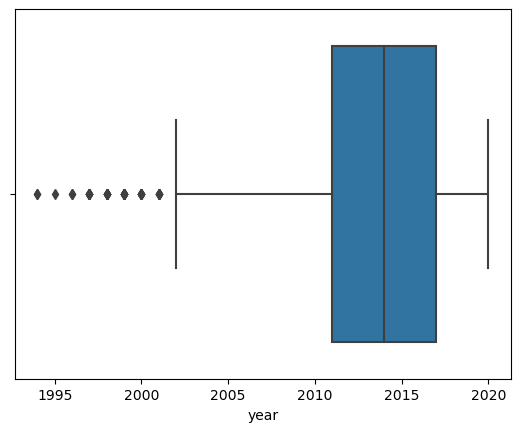

In [25]:
#check outliers in year column
sns.boxplot(new_df.year)

In [26]:
#drop the less than 2000years
new_df = new_df[new_df.year>=2000]

In [27]:
(new_df.km_driven>=200000).value_counts()

False    6359
True      139
Name: km_driven, dtype: int64

In [28]:
q1 = new_df.km_driven.quantile(0.25)

In [29]:
q3 = new_df.km_driven.quantile(0.75)

In [30]:
iqr = q3-q1

In [31]:
max_val_km_driven = q3+1.5*iqr

In [32]:
#drop the row 2lac km driven a car
new_df = new_df[new_df.km_driven<200000]

<AxesSubplot:xlabel='km_driven'>

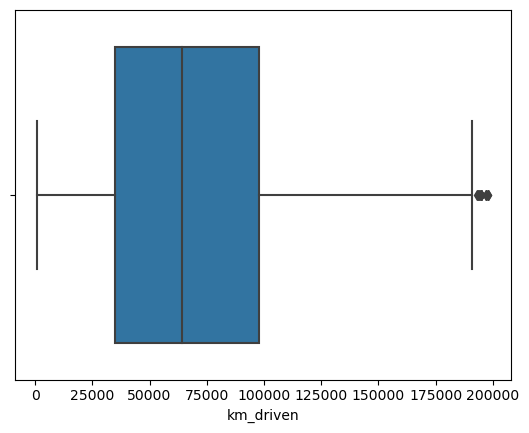

In [33]:
sns.boxplot(new_df.km_driven)

In [34]:
new_df.reset_index(drop=True, inplace=True)
new_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,company,car_name
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Maruti,Maruti Swift
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,Skoda,Skoda Rapid
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Honda,Honda City
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Hyundai,Hyundai i20
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Maruti,Maruti Swift
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6354,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5,Hyundai,Hyundai Santro
6355,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5,Maruti,Maruti Wagon
6356,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5,Hyundai,Hyundai i20
6357,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5,Hyundai,Hyundai i20


In [35]:
dummie_new_df = pd.get_dummies(new_df,columns=["company","car_name"])
dummie_new_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,car_name_Volkswagen GTI,car_name_Volkswagen Jetta,car_name_Volkswagen Passat,car_name_Volkswagen Polo,car_name_Volkswagen Vento,car_name_Volvo S60,car_name_Volvo S90,car_name_Volvo V40,car_name_Volvo XC40,car_name_Volvo XC60
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,...,0,0,0,0,0,0,0,0,0,0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,...,0,0,0,0,0,0,0,0,0,0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,...,0,0,0,0,0,0,0,0,0,0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,...,0,0,0,0,0,0,0,0,0,0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6354,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,...,0,0,0,0,0,0,0,0,0,0
6355,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,...,0,0,0,0,0,0,0,0,0,0
6356,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,...,0,0,0,0,0,0,0,0,0,0
6357,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,...,0,0,0,0,0,0,0,0,0,0


In [36]:
col = ["fuel","seller_type","transmission","owner"]

In [37]:
le = LabelEncoder()

In [38]:
dummie_new_df[col] = new_df[col].apply(le.fit_transform)

In [39]:
dummie_new_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,car_name_Volkswagen GTI,car_name_Volkswagen Jetta,car_name_Volkswagen Passat,car_name_Volkswagen Polo,car_name_Volkswagen Vento,car_name_Volvo S60,car_name_Volvo S90,car_name_Volvo V40,car_name_Volvo XC40,car_name_Volvo XC60
0,2014,450000,145500,1,1,1,0,23.40,1248,74.00,...,0,0,0,0,0,0,0,0,0,0
1,2014,370000,120000,1,1,1,1,21.14,1498,103.52,...,0,0,0,0,0,0,0,0,0,0
2,2006,158000,140000,3,1,1,2,17.70,1497,78.00,...,0,0,0,0,0,0,0,0,0,0
3,2010,225000,127000,1,1,1,0,23.00,1396,90.00,...,0,0,0,0,0,0,0,0,0,0
4,2007,130000,120000,3,1,1,0,16.10,1298,88.20,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6354,2008,120000,191000,3,1,1,0,17.92,1086,62.10,...,0,0,0,0,0,0,0,0,0,0
6355,2013,260000,50000,3,1,1,1,18.90,998,67.10,...,0,0,0,0,0,0,0,0,0,0
6356,2014,475000,80000,1,1,1,1,22.54,1396,88.73,...,0,0,0,0,0,0,0,0,0,0
6357,2013,320000,110000,3,1,1,0,18.50,1197,82.85,...,0,0,0,0,0,0,0,0,0,0


# Split the Data

In [40]:
x = dummie_new_df.drop(columns="selling_price", axis = 1)
y = dummie_new_df.selling_price

In [41]:
x

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,...,car_name_Volkswagen GTI,car_name_Volkswagen Jetta,car_name_Volkswagen Passat,car_name_Volkswagen Polo,car_name_Volkswagen Vento,car_name_Volvo S60,car_name_Volvo S90,car_name_Volvo V40,car_name_Volvo XC40,car_name_Volvo XC60
0,2014,145500,1,1,1,0,23.40,1248,74.00,5,...,0,0,0,0,0,0,0,0,0,0
1,2014,120000,1,1,1,1,21.14,1498,103.52,5,...,0,0,0,0,0,0,0,0,0,0
2,2006,140000,3,1,1,2,17.70,1497,78.00,5,...,0,0,0,0,0,0,0,0,0,0
3,2010,127000,1,1,1,0,23.00,1396,90.00,5,...,0,0,0,0,0,0,0,0,0,0
4,2007,120000,3,1,1,0,16.10,1298,88.20,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6354,2008,191000,3,1,1,0,17.92,1086,62.10,5,...,0,0,0,0,0,0,0,0,0,0
6355,2013,50000,3,1,1,1,18.90,998,67.10,5,...,0,0,0,0,0,0,0,0,0,0
6356,2014,80000,1,1,1,1,22.54,1396,88.73,5,...,0,0,0,0,0,0,0,0,0,0
6357,2013,110000,3,1,1,0,18.50,1197,82.85,5,...,0,0,0,0,0,0,0,0,0,0


In [42]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
6354    120000
6355    260000
6356    475000
6357    320000
6358    382000
Name: selling_price, Length: 6359, dtype: int64

# Train Test Split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [44]:
print(x_train.shape,x_test.shape,x.shape)

(4769, 233) (1590, 233) (6359, 233)


# Model Train

In [45]:
model_pram = {
    "Linear_regression" :{
        'model': LinearRegression(),
        'parameter' : {
            'normalize' : [True,False]
        }
    },
    "Lasso" : {
        'model' : Lasso(),
        'parameter' : {
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
        }
    },
    "Decision_tree" : {
        'model' : DecisionTreeRegressor(),
        'parameter' : {
            'criterion': ['squared_error',"friedman_mse", "absolute_error","poisson"],
            "random_state" : [10,20,30,40,50,60,70,80,90,100]
        }
    },
    "Random_forest" : {
        'model' : RandomForestRegressor(),
        'parameter' : {
            'n_estimators' : [50,100,150,200,250,300],
            'criterion' : ['squared_error',"absolute_error", "poisson"]
        }
    }
}

In [48]:
score = []

for model_name,mp in model_pram.items():
    clf = GridSearchCV(mp['model'],mp["parameter"], cv = 5)
    clf.fit(x_train,y_train)
    print(score)
    score.append({
        'model': model_name,
        'best_score' : clf.best_score_,
        'best_parameters' : clf.best_params_,
        'estimator' : clf.best_estimator_
    })
    
df = pd.DataFrame(score,columns= ['model','best_score','best_prameter',"estimator"])
df

[]
[{'model': 'Linear_regression', 'best_score': -25392191043.17967, 'best_parameters': {'normalize': False}, 'estimator': LinearRegression(normalize=False)}]
[{'model': 'Linear_regression', 'best_score': -25392191043.17967, 'best_parameters': {'normalize': False}, 'estimator': LinearRegression(normalize=False)}, {'model': 'Lasso', 'best_score': 0.8326769075825403, 'best_parameters': {'alpha': 1, 'selection': 'cyclic'}, 'estimator': Lasso(alpha=1)}]
[{'model': 'Linear_regression', 'best_score': -25392191043.17967, 'best_parameters': {'normalize': False}, 'estimator': LinearRegression(normalize=False)}, {'model': 'Lasso', 'best_score': 0.8326769075825403, 'best_parameters': {'alpha': 1, 'selection': 'cyclic'}, 'estimator': Lasso(alpha=1)}, {'model': 'Decision_tree', 'best_score': 0.8622759121260215, 'best_parameters': {'criterion': 'friedman_mse', 'random_state': 20}, 'estimator': DecisionTreeRegressor(criterion='friedman_mse', random_state=20)}]


,model,best_score,best_prameter,estimator
0,Linear_regression,-2.539219e+10,NaN,LinearRegression(normalize=False)
1,Lasso,8.326769e-01,NaN,Lasso(alpha=1)
2,Decision_tree,8.622759e-01,NaN,DecisionTreeRegressor(criterion='friedman_mse'...
3,Random_forest,9.116357e-01,NaN,(DecisionTreeRegressor(criterion='absolute_err...
